In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn. metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

#custom functions
def NSC(y_pred,y_true):
    """
    Nash-Sutcliffe Coefficient
    """
    return 1 - sum((y_pred-y_true)**2)/sum((y_true-np.mean(y_true))**2)

def corr(data1, data2):
    "data1 & data2 should be numpy arrays."
    mean1 = data1.mean() 
    mean2 = data2.mean()
    std1 = data1.std()
    std2 = data2.std()

#     corr = ((data1-mean1)*(data2-mean2)).mean()/(std1*std2)
    corr = ((data1*data2).mean()-mean1*mean2)/(std1*std2)
    return corr


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
#Load dataframes
dir_data = '../data/Features/'

Potohar_HR_Features = pd.read_excel(dir_data + 'Potohar_HR_Features.xlsx')
Potohar_HR_Features = Potohar_HR_Features.fillna(0)
Potohar_HR_Features.name ='Potohar_HR_Features'


In [3]:
#Top Temperature weekly, categorical

Season_Jan_Apr_Meanweekly_C= [
     'WK_9_Meanweekly_C','WK_10_Meanweekly_C','WK_11_Meanweekly_C','WK_12_Meanweekly_C',
    'WK_13_Meanweekly_C','WK_14_Meanweekly_C','WK_15_Meanweekly_C','WK_16_Meanweekly_C',
    'WK_17_Meanweekly_C','WK_18_Meanweekly_C','WK_19_Meanweekly_C','WK_20_Meanweekly_C',
    'WK_21_Meanweekly_C','WK_22_Meanweekly_C','WK_23_Meanweekly_C','WK_24_Meanweekly_C',
]

Season_Jan_Apr_Minweekly_C= [
     'WK_9_Minweekly_C','WK_10_Minweekly_C','WK_11_Minweekly_C','WK_12_Minweekly_C',
    'WK_13_Minweekly_C','WK_14_Minweekly_C','WK_15_Minweekly_C','WK_16_Minweekly_C',
    'WK_17_Minweekly_C','WK_18_Minweekly_C','WK_19_Minweekly_C','WK_20_Minweekly_C',
    'WK_21_Minweekly_C','WK_22_Minweekly_C','WK_23_Minweekly_C','WK_24_Minweekly_C',
]

Season_Jan_Apr_Maxweekly_C= [
     'WK_9_Maxweekly_C','WK_10_Maxweekly_C','WK_11_Maxweekly_C','WK_12_Maxweekly_C',
    'WK_13_Maxweekly_C','WK_14_Maxweekly_C','WK_15_Maxweekly_C','WK_16_Maxweekly_C',
    'WK_17_Maxweekly_C','WK_18_Maxweekly_C','WK_19_Maxweekly_C','WK_20_Maxweekly_C',
    'WK_21_Maxweekly_C','WK_22_Maxweekly_C','WK_23_Maxweekly_C','WK_24_Maxweekly_C',
]


Season_Monthly_AirTemp_Max = [
    'Mar_Maxmonthly_C','Nov_Maxmonthly_C','MaxMonth_Season_Airtemp_C',
    'Apr_Maxmonthly_C','Jan_Maxmonthly_C', 'Dec_Maxmonthly_C', 'Feb_Maxmonthly_C'
]

Season_Jan_Apr_MeanweeklyMonthly_C= [
     'WK_9_Meanweekly_C','WK_10_Meanweekly_C','WK_11_Meanweekly_C','WK_12_Meanweekly_C',
    'WK_13_Meanweekly_C','WK_14_Meanweekly_C','WK_15_Meanweekly_C','WK_16_Meanweekly_C',
    'WK_17_Meanweekly_C','WK_18_Meanweekly_C','WK_19_Meanweekly_C','WK_20_Meanweekly_C',
    'WK_21_Meanweekly_C','WK_22_Meanweekly_C','WK_23_Meanweekly_C','WK_24_Meanweekly_C',
    'Mar_Meanmonthly_C', 'Season_MonthlyMeandaily_Airtemp_C','Apr_Meanmonthly_C','Jan_Meanmonthly_C',
    'Feb_Meanmonthly_C'
]

Season_Airtemp_Hrsabove=[
    'Nov_monthly_Hrsabove_10C', 'Nov_monthly_Hrsabove_15C', 'Nov_monthly_Hrsabove_20C',
    'Dec_monthly_Hrsabove_10C','Dec_monthly_Hrsabove_15C','Dec_monthly_Hrsabove_20C',
    'Jan_monthly_Hrsabove_10C','Jan_monthly_Hrsabove_15C','Jan_monthly_Hrsabove_20C',
    'Feb_monthly_Hrsabove_10C','Feb_monthly_Hrsabove_15C', 'Feb_monthly_Hrsabove_20C','Feb_monthly_Hrsabove_25C',
    'Mar_monthly_Hrsabove_10C','Mar_monthly_Hrsabove_15C','Mar_monthly_Hrsabove_20C','Mar_monthly_Hrsabove_25C',
    'Apr_monthly_Hrsabove_10C','Apr_monthly_Hrsabove_15C','Apr_monthly_Hrsabove_20C','Apr_monthly_Hrsabove_25C',
    'Season_Hrsabove_10C', 'Season_Hrsabove_15C','Season_Hrsabove_20C','Season_Hrsabove_25C',
]

Seasson_Airtemp_Hrsbelow=[
    'Nov_monthly_Hrsbelow_0C','Nov_monthly_Hrsbelow_5C','Nov_monthly_Hrsbelow_10C',
    'Dec_monthly_Hrsbelow_0C','Dec_monthly_Hrsbelow_5C','Dec_monthly_Hrsbelow_10C',
    'Jan_monthly_Hrsbelow_0C','Jan_monthly_Hrsbelow_5C','Jan_monthly_Hrsbelow_10C',
    'Feb_monthly_Hrsbelow_0C','Feb_monthly_Hrsbelow_5C','Feb_monthly_Hrsbelow_10C',
    'Mar_monthly_Hrsbelow_0C','Mar_monthly_Hrsbelow_5C','Mar_monthly_Hrsbelow_10C',
    'Apr_monthly_Hrsbelow_0C','Apr_monthly_Hrsbelow_5C','Apr_monthly_Hrsbelow_10C',
    'Season_Hrsbelow_0C','Season_Hrsbelow_5C','Season_Hrsbelow_10C'
]

In [4]:
#surface temperature, categorical
Season_Jan_Apr_Meanweekly_STemp_0_10cm= [
     'WK_9_Meanweekly_STemp_0_10cm','WK_10_Meanweekly_STemp_0_10cm','WK_11_Meanweekly_STemp_0_10cm','WK_12_Meanweekly_STemp_0_10cm',
    'WK_13_Meanweekly_STemp_0_10cm','WK_14_Meanweekly_STemp_0_10cm','WK_15_Meanweekly_STemp_0_10cm','WK_16_Meanweekly_STemp_0_10cm',
    'WK_17_Meanweekly_STemp_0_10cm','WK_18_Meanweekly_STemp_0_10cm','WK_19_Meanweekly_STemp_0_10cm','WK_20_Meanweekly_STemp_0_10cm',
    'WK_21_Meanweekly_STemp_0_10cm','WK_22_Meanweekly_STemp_0_10cm','WK_23_Meanweekly_STemp_0_10cm','WK_24_Meanweekly_STemp_0_10cm',
]

Season_Jan_Apr_Minweekly_STemp_0_10cm= [
     'WK_9_Minweekly_STemp_0_10cm','WK_10_Minweekly_STemp_0_10cm','WK_11_Minweekly_STemp_0_10cm','WK_12_Minweekly_STemp_0_10cm',
    'WK_13_Minweekly_STemp_0_10cm','WK_14_Minweekly_STemp_0_10cm','WK_15_Minweekly_STemp_0_10cm','WK_16_Minweekly_STemp_0_10cm',
    'WK_17_Minweekly_STemp_0_10cm','WK_18_Minweekly_STemp_0_10cm','WK_19_Minweekly_STemp_0_10cm','WK_20_Minweekly_STemp_0_10cm',
    'WK_21_Minweekly_STemp_0_10cm','WK_22_Minweekly_STemp_0_10cm','WK_23_Minweekly_STemp_0_10cm','WK_24_Minweekly_STemp_0_10cm',
]

Season_Jan_Apr_Maxweekly_STemp_0_10cm= [
     'WK_9_Maxweekly_STemp_0_10cm','WK_10_Maxweekly_STemp_0_10cm','WK_11_Maxweekly_STemp_0_10cm','WK_12_Maxweekly_STemp_0_10cm',
    'WK_13_Maxweekly_STemp_0_10cm','WK_14_Maxweekly_STemp_0_10cm','WK_15_Maxweekly_STemp_0_10cm','WK_16_Maxweekly_STemp_0_10cm',
    'WK_17_Maxweekly_STemp_0_10cm','WK_18_Maxweekly_STemp_0_10cm','WK_19_Maxweekly_STemp_0_10cm','WK_20_Maxweekly_STemp_0_10cm',
    'WK_21_Maxweekly_STemp_0_10cm','WK_22_Maxweekly_STemp_0_10cm','WK_23_Maxweekly_STemp_0_10cm','WK_24_Maxweekly_STemp_0_10cm',
]

Season_Jan_Apr_Meanweekly_Monthly_STemp_0_10cm= [
     'WK_9_Meanweekly_STemp_0_10cm','WK_10_Meanweekly_STemp_0_10cm','WK_11_Meanweekly_STemp_0_10cm','WK_12_Meanweekly_STemp_0_10cm',
    'WK_13_Meanweekly_STemp_0_10cm','WK_14_Meanweekly_STemp_0_10cm','WK_15_Meanweekly_STemp_0_10cm','WK_16_Meanweekly_STemp_0_10cm',
    'WK_17_Meanweekly_STemp_0_10cm','WK_18_Meanweekly_STemp_0_10cm','WK_19_Meanweekly_STemp_0_10cm','WK_20_Meanweekly_STemp_0_10cm',
    'WK_21_Meanweekly_STemp_0_10cm','WK_22_Meanweekly_STemp_0_10cm','WK_23_Meanweekly_STemp_0_10cm','WK_24_Meanweekly_STemp_0_10cm',
     'Feb_Meanmonthly_STemp_0_10cm','Mar_Meanmonthly_STemp_0_10cm','MeanMonth_Season_STemp_0_10cm',
    'Nov_Meanmonthly_STemp_0_10cm','Dec_Meanmonthly_STemp_0_10cm', 'Jan_Meanmonthly_STemp_0_10cm', 
]



Season_STempMean =[
    'Feb_Meanmonthly_STemp_0_10cm','Mar_Meanmonthly_STemp_0_10cm','MeanMonth_Season_STemp_0_10cm',
    'Nov_Meanmonthly_STemp_0_10cm','Dec_Meanmonthly_STemp_0_10cm', 'Jan_Meanmonthly_STemp_0_10cm', 
]


Season_STempMin =[
    'Feb_Minmonthly_STemp_0_10cm','Mar_Minmonthly_STemp_0_10cm','MinMonth_Season_STemp_0_10cm',
    'Nov_Minmonthly_STemp_0_10cm','Dec_Minmonthly_STemp_0_10cm', 'Jan_Minmonthly_STemp_0_10cm'
]

Season_STempHrs0_5C=[
    'Feb_monthly_STemp_Hrs0_5C','Season_Hrsbelow_15C','Dec_monthly_STemp_Hrs0_5C',
    'Jan_monthly_STemp_Hrs0_5C','Nov_monthly_STemp_Hrs0_5C'
]

Season_STempHrsabove_10C=[
    'Feb_monthly_STemp_Hrsabove_10C','Season_Hrsabove_10C','Dec_monthly_STemp_Hrsabove_10C',
    'Jan_monthly_STemp_Hrsabove_10C','Nov_monthly_STemp_Hrsabove_10C'
]

Season_STempHrsabove=[
    'Nov_monthly_STemp_Hrsabove_10C', 'Nov_monthly_STemp_Hrsabove_15C', 'Nov_monthly_STemp_Hrsabove_20C',
    'Dec_monthly_STemp_Hrsabove_10C','Dec_monthly_STemp_Hrsabove_15C','Dec_monthly_STemp_Hrsabove_20C',
    'Jan_monthly_STemp_Hrsabove_10C','Jan_monthly_STemp_Hrsabove_15C','Jan_monthly_STemp_Hrsabove_20C',
    'Feb_monthly_STemp_Hrsabove_10C','Feb_monthly_STemp_Hrsabove_15C', 'Feb_monthly_STemp_Hrsabove_20C','Feb_monthly_STemp_Hrsabove_25C',
    'Mar_monthly_STemp_Hrsabove_10C','Mar_monthly_STemp_Hrsabove_15C','Mar_monthly_STemp_Hrsabove_20C','Mar_monthly_STemp_Hrsabove_25C',
    'Apr_monthly_STemp_Hrsabove_10C','Apr_monthly_STemp_Hrsabove_15C','Apr_monthly_STemp_Hrsabove_20C','Apr_monthly_STemp_Hrsabove_25C',
    'Season_STemp_Hrsabove_10C', 'Season_STemp_Hrsabove_15C','Season_STemp_Hrsabove_20C','Season_STemp_Hrsabove_25C',
]

Seasson_STempHrsbelow=[
    'Nov_monthly_STemp_Hrsbelow_0C','Nov_monthly_STemp_Hrsbelow_5C','Nov_monthly_STemp_Hrsbelow_10C',
    'Dec_monthly_STemp_Hrsbelow_0C','Dec_monthly_STemp_Hrsbelow_5C','Dec_monthly_STemp_Hrsbelow_10C',
    'Jan_monthly_STemp_Hrsbelow_0C','Jan_monthly_STemp_Hrsbelow_5C','Jan_monthly_STemp_Hrsbelow_10C',
    'Feb_monthly_STemp_Hrsbelow_0C','Feb_monthly_STemp_Hrsbelow_5C','Feb_monthly_STemp_Hrsbelow_10C',
    'Mar_monthly_STemp_Hrsbelow_0C','Mar_monthly_STemp_Hrsbelow_5C','Mar_monthly_STemp_Hrsbelow_10C',
    'Apr_monthly_STemp_Hrsbelow_0C','Apr_monthly_STemp_Hrsbelow_5C','Apr_monthly_STemp_Hrsbelow_10C',
    'Season_STemp_Hrsbelow_0C','Season_STemp_Hrsbelow_5C','Season_STemp_Hrsbelow_10C'
]

In [5]:
#precipitation, categorical
Season_Jan_Apr_Sumweekly_Precip_mm= [
     'WK_9_Sumweekly_Precip_mm','WK_10_Sumweekly_Precip_mm','WK_11_Sumweekly_Precip_mm','WK_12_Sumweekly_Precip_mm',
    'WK_13_Sumweekly_Precip_mm','WK_14_Sumweekly_Precip_mm','WK_15_Sumweekly_Precip_mm','WK_16_Sumweekly_Precip_mm',
    'WK_17_Sumweekly_Precip_mm','WK_18_Sumweekly_Precip_mm','WK_19_Sumweekly_Precip_mm','WK_20_Sumweekly_Precip_mm',
    'WK_21_Sumweekly_Precip_mm','WK_22_Sumweekly_Precip_mm','WK_23_Sumweekly_Precip_mm','WK_24_Sumweekly_Precip_mm',
]

Season_Jan_Apr_Sumweekly_Monthly_Precip_mm= [
     'WK_9_Sumweekly_Precip_mm','WK_10_Sumweekly_Precip_mm','WK_11_Sumweekly_Precip_mm','WK_12_Sumweekly_Precip_mm',
    'WK_13_Sumweekly_Precip_mm','WK_14_Sumweekly_Precip_mm','WK_15_Sumweekly_Precip_mm','WK_16_Sumweekly_Precip_mm',
    'WK_17_Sumweekly_Precip_mm','WK_18_Sumweekly_Precip_mm','WK_19_Sumweekly_Precip_mm','WK_20_Sumweekly_Precip_mm',
    'WK_21_Sumweekly_Precip_mm','WK_22_Sumweekly_Precip_mm','WK_23_Sumweekly_Precip_mm','WK_24_Sumweekly_Precip_mm',
    'Season_Summonthly_Precip_mm','Feb_Summonthly_Precip_mm','Mar_Summonthly_Precip_mm',
    'Jan_Summonthly_Precip_mm','Dec_Summonthly_Precip_mm', 'Nov_Summonthly_Precip_mm'
]


Season_Precip_SumMonthly =[
    'Season_Summonthly_Precip_mm','Feb_Summonthly_Precip_mm','Mar_Summonthly_Precip_mm',
    'Jan_Summonthly_Precip_mm','Dec_Summonthly_Precip_mm', 'Nov_Summonthly_Precip_mm'
]

Season_Precip_SumMonthlyADV=[
    'Nov_Feb_Summonthly_Precip_mm','Nov_Feb_Summonthly_Precip_mm','Season_Summonthly_Precip_mm',
    'Season_Summonthly_Precip_mm','Feb_Mar_Summonthly_Precip_mm'
]

Season_Precip_Hours = [
    'Jan_Mar_Precip_hours','Dec_Mar_Precip_hours','NovandMar_Precip_hours',
    'NovandJan_Mar_Precip_hours','DecandMar_Precip_hours'
]

Season_Precip_StatsBasictop5=[
    'Season_Summonthly_Precip_mm','Mean_Monthly_Precip_mm','MaxMonth_Season_Precip_mm',
    'Season_Precip_hours','MinMonth_Season_Precip_mm'
]

Season_Preciphrs_1_5mmhr=[
    'Season_1_5mmhr','Mar_monthly_Precip_1_5mmhr','Jan_monthly_Precip_1_5mmhr',
    'Feb_monthly_Precip_1_5mmhr','Apr_monthly_Precip_1_5mmhr'
]

Season_Preciphrs_1_5mmhrADV=[
    'JanandMar_1_5mmhr','Dec_Feb_1_5mmhr','Jan_Feb_1_5mmhr',
    'JanandMar_Apr_1_5mmhr','Nov_Feb_1_5mmhr'
]

In [6]:
#Soil moisture, categorical
Season_Jan_Apr_Meanweekly_SM_0_10cm= [
     'WK_9_Meanweekly_SM_0_10cm','WK_10_Meanweekly_SM_0_10cm','WK_11_Meanweekly_SM_0_10cm','WK_12_Meanweekly_SM_0_10cm',
    'WK_13_Meanweekly_SM_0_10cm','WK_14_Meanweekly_SM_0_10cm','WK_15_Meanweekly_SM_0_10cm','WK_16_Meanweekly_SM_0_10cm',
    'WK_17_Meanweekly_SM_0_10cm','WK_18_Meanweekly_SM_0_10cm','WK_19_Meanweekly_SM_0_10cm','WK_20_Meanweekly_SM_0_10cm',
    'WK_21_Meanweekly_SM_0_10cm','WK_22_Meanweekly_SM_0_10cm','WK_23_Meanweekly_SM_0_10cm','WK_24_Meanweekly_SM_0_10cm',
]

Season_Jan_Apr_Meanweekly_Monthly_SM_0_10cm= [
     'WK_9_Meanweekly_SM_0_10cm','WK_10_Meanweekly_SM_0_10cm','WK_11_Meanweekly_SM_0_10cm','WK_12_Meanweekly_SM_0_10cm',
    'WK_13_Meanweekly_SM_0_10cm','WK_14_Meanweekly_SM_0_10cm','WK_15_Meanweekly_SM_0_10cm','WK_16_Meanweekly_SM_0_10cm',
    'WK_17_Meanweekly_SM_0_10cm','WK_18_Meanweekly_SM_0_10cm','WK_19_Meanweekly_SM_0_10cm','WK_20_Meanweekly_SM_0_10cm',
    'WK_21_Meanweekly_SM_0_10cm','WK_22_Meanweekly_SM_0_10cm','WK_23_Meanweekly_SM_0_10cm','WK_24_Meanweekly_SM_0_10cm',
    'Nov_Meanmonthly_SM_0_10cm','Dec_Meanmonthly_SM_0_10cm','Jan_Meanmonthly_SM_0_10cm',
    'Feb_Meanmonthly_SM_0_10cm','Mar_Meanmonthly_SM_0_10cm','Apr_Meanmonthly_SM_0_10cm',  
]

Season_SMMax = [
    'Nov_Maxmonthly_SM_0_10cm','Dec_Maxmonthly_SM_0_10cm','Jan_Maxmonthly_SM_0_10cm',
    'Feb_Maxmonthly_SM_0_10cm','Mar_Maxmonthly_SM_0_10cm','Apr_Maxmonthly_SM_0_10cm'
]

Season_SMMean=[
    'Nov_Meanmonthly_SM_0_10cm','Dec_Meanmonthly_SM_0_10cm','Jan_Meanmonthly_SM_0_10cm',
    'Feb_Meanmonthly_SM_0_10cm','Mar_Meanmonthly_SM_0_10cm','Apr_Meanmonthly_SM_0_10cm',   
]

Season_SMMin=[
    'Nov_Minmonthly_SM_0_10cm','Dec_Minmonthly_SM_0_10cm','Jan_Minmonthly_SM_0_10cm',
    'Feb_Minmonthly_SM_0_10cm','Mar_Minmonthly_SM_0_10cm','Apr_Minmonthly_SM_0_10cm',
    
]

In [7]:
#Combined Season Weekly and Monthly data, updated to not include same weeks min, max, mean, use mean as default
Season_Week_Month_top5 = [
    'WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_16_Minweekly_SM_0_10cm',
    'WK_21_Minweekly_SM_0_10cm','WK_10_Minweekly_SM_0_10cm',
    
    'WK_13_Maxweekly_SM_0_10cm','WK_9_Maxweekly_SM_0_10cm','WK_20_Maxweekly_SM_0_10cm',
    
    'WK_14_weekly_STemp_Hrsabove_10C','WK_24_weekly_STemp_Hrsabove_10C','WK_16_weekly_STemp_Hrsabove_10C','WK_15_weekly_STemp_Hrsabove_10C',
    'WK_13_weekly_STemp_Hrsabove_10C',
    
    'Feb_Minmonthly_SM_0_10cm','MaxMonth_Season_Precip_mm',
    'Jan_Maxmonthly_SM_10_40cm',
    
    'NovandMar_Precip_hours', 'Season_Summonthly_Precip_mm','Mean_Monthly_Precip_mm',
    'MaxMonth_Season_Precip_mm', 'Season_Precip_hours','MinMonth_Season_Precip_mm',
    
    'Jan_monthly_Air_temp_Hrs15_20C'

]

Season_Week_Month_top3 = [
    'WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_16_Minweekly_SM_0_10cm',
    'WK_13_Maxweekly_SM_0_10cm',
    
    'WK_14_weekly_STemp_Hrsabove_10C','WK_24_weekly_STemp_Hrsabove_10C','WK_16_weekly_STemp_Hrsabove_10C',
    
    'Feb_Minmonthly_SM_0_10cm','Jan_Maxmonthly_SM_10_40cm',
    
    'MaxMonth_Season_Precip_mm','Season_Summonthly_Precip_mm','Mean_Monthly_Precip_mm','MaxMonth_Season_Precip_mm',
    
]

Season_Week_Month_top2 = [
    'WK_14_Minweekly_SM_0_10cm','WK_15_Minweekly_SM_0_10cm','WK_13_Maxweekly_SM_0_10cm',
    
    'WK_14_weekly_STemp_Hrsabove_10C','WK_24_weekly_STemp_Hrsabove_10C',
    
    'Feb_Minmonthly_SM_0_10cm',
    
    'MaxMonth_Season_Precip_mm','Season_Summonthly_Precip_mm','Mean_Monthly_Precip_mm', 
    
    'Jan_Maxmonthly_SM_10_40cm'
]


Season_Week_Month_top1 = [
    'WK_14_Minweekly_SM_0_10cm','WK_13_Maxweekly_SM_0_10cm','WK_14_weekly_STemp_Hrsabove_10C',
    'Feb_Minmonthly_SM_0_10cm', 'Season_Summonthly_Precip_mm','Jan_Maxmonthly_SM_10_40cm'
]

In [8]:
#Combined Season Weekly and Monthly data
Top_Features={
    'Season_Jan_Apr_Meanweekly_C':Season_Jan_Apr_Meanweekly_C,
    'Season_Jan_Apr_Minweekly_C':Season_Jan_Apr_Minweekly_C,
    'Season_Jan_Apr_Maxweekly_C':Season_Jan_Apr_Maxweekly_C,
    'Season_Monthly_AirTemp_Max' :Season_Monthly_AirTemp_Max,
    'Season_Jan_Apr_MeanweeklyMonthly_C':Season_Jan_Apr_MeanweeklyMonthly_C,
    'Season_Airtemp_Hrsabove':Season_Airtemp_Hrsabove,
    'Seasson_Airtemp_Hrsbelow':Seasson_Airtemp_Hrsbelow,
    'Season_Jan_Apr_Meanweekly_STemp_0_10cm':Season_Jan_Apr_Meanweekly_STemp_0_10cm,
    'Season_Jan_Apr_Minweekly_STemp_0_10cm':Season_Jan_Apr_Minweekly_STemp_0_10cm,
    'Season_Jan_Apr_Maxweekly_STemp_0_10cm':Season_Jan_Apr_Maxweekly_STemp_0_10cm,
    'Season_Jan_Apr_Meanweekly_Monthly_STemp_0_10cm':Season_Jan_Apr_Meanweekly_Monthly_STemp_0_10cm,
    'Season_STempMean' :Season_STempMean,
    'Season_STempMin' :Season_STempMin,
    'Season_STempHrs0_5C':Season_STempHrs0_5C,
    'Season_STempHrsabove_10C':Season_STempHrsabove_10C,
    'Season_STempHrsabove':Season_STempHrsabove,
    'Seasson_STempHrsbelow':Seasson_STempHrsbelow,
    'Season_Jan_Apr_Sumweekly_Precip_mm':Season_Jan_Apr_Sumweekly_Precip_mm,
    'Season_Jan_Apr_Sumweekly_Monthly_Precip_mm':Season_Jan_Apr_Sumweekly_Monthly_Precip_mm,
    'Season_Precip_SumMonthly' :Season_Precip_SumMonthly,
    'Season_Precip_SumMonthlyADV':Season_Precip_SumMonthlyADV,
    'Season_Precip_Hours':Season_Precip_Hours,
    'Season_Precip_StatsBasictop5':Season_Precip_StatsBasictop5,
    'Season_Preciphrs_1_5mmhr':Season_Preciphrs_1_5mmhr,
    'Season_Preciphrs_1_5mmhrADV':Season_Preciphrs_1_5mmhrADV,
    'Season_Jan_Apr_Meanweekly_SM_0_10cm':Season_Jan_Apr_Meanweekly_SM_0_10cm,
    'Season_Jan_Apr_Meanweekly_Monthly_SM_0_10cm':Season_Jan_Apr_Meanweekly_Monthly_SM_0_10cm,
    'Season_SMMax' :Season_SMMax,
    'Season_SMMean':Season_SMMean,
    'Season_SMMin':Season_SMMin,
    'Season_Week_Month_top5':Season_Week_Month_top5, 
    'Season_Week_Month_top3':Season_Week_Month_top3,
    'Season_Week_Month_top2':Season_Week_Month_top2, 
    'Season_Week_Month_top1':Season_Week_Month_top1,
   

}


top_features =[
    'Season_Jan_Apr_Meanweekly_C','Season_Jan_Apr_Minweekly_C','Season_Jan_Apr_Maxweekly_C',
    'Season_Monthly_AirTemp_Max' ,'Season_Jan_Apr_MeanweeklyMonthly_C','Season_Airtemp_Hrsabove',
    'Seasson_Airtemp_Hrsbelow','Season_Jan_Apr_Meanweekly_STemp_0_10cm','Season_Jan_Apr_Minweekly_STemp_0_10cm',
    'Season_Jan_Apr_Maxweekly_STemp_0_10cm','Season_Jan_Apr_Meanweekly_STemp_0_10cm','Season_STempMean',
    'Season_STempMin' ,'Season_STempHrs0_5C','Season_STempHrsabove_10C',
    'Season_STempHrsabove','Seasson_STempHrsbelow','Season_Jan_Apr_Sumweekly_Precip_mm',
    'Season_Jan_Apr_Sumweekly_Monthly_Precip_mm','Season_Precip_SumMonthly','Season_Precip_SumMonthlyADV',
    'Season_Precip_Hours','Season_Precip_StatsBasictop5','Season_Preciphrs_1_5mmhr',
    'Season_Preciphrs_1_5mmhrADV','Season_Jan_Apr_Meanweekly_SM_0_10cm','Season_Jan_Apr_Meanweekly_Monthly_SM_0_10cm',
    'Season_SMMax','Season_SMMean','Season_SMMin',
    'Season_Week_Month_top5' ,'Season_Week_Month_top3','Season_Week_Month_top2' ,
    'Season_Week_Month_top1'
]

In [9]:
  #Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features!!!!!!!!!!!!!!!
def Direct_Out(features): 
    global dir_out
    global directory
    directory = '../output/V2/RF'
    
    if features == Season_Jan_Apr_Meanweekly_C:
        dir_out = directory + '/Season_Jan_Apr_Meanweekly_C/'    
    elif features == Season_Jan_Apr_Minweekly_C:
        dir_out = directory + '/Season_Jan_Apr_Minweekly_C/'
    elif features ==Season_Jan_Apr_Maxweekly_C:
        dir_out = directory + '/Season_Jan_Apr_Maxweekly_C/'
    elif features == Season_Monthly_AirTemp_Max:
        dir_out = directory + '/Season_Monthly_AirTemp_Max/'
    elif features == Season_Jan_Apr_MeanweeklyMonthly_C:
        dir_out = directory + '/Season_Jan_Apr_MeanweeklyMonthly_C/'
    elif features == Season_Airtemp_Hrsabove:
        dir_out = directory + '/Season_Airtemp_Hrsabove/'   
        
    elif features == Seasson_Airtemp_Hrsbelow:
        dir_out = directory + '/Seasson_Airtemp_Hrsbelow/'    
    elif features == Season_Jan_Apr_Meanweekly_STemp_0_10cm:
        dir_out = directory + '/Season_Jan_Apr_Meanweekly_STemp_0_10cm/'
    elif features ==Season_Jan_Apr_Minweekly_STemp_0_10cm:
        dir_out = directory + '/Season_Jan_Apr_Minweekly_STemp_0_10cm/'
    elif features == Season_Jan_Apr_Maxweekly_STemp_0_10cm:
        dir_out = directory + '/Season_Jan_Apr_Maxweekly_STemp_0_10cm/'
    elif features == Season_Jan_Apr_Meanweekly_Monthly_STemp_0_10cm:
        dir_out = directory + '/Season_Jan_Apr_Meanweekly_Monthly_STemp_0_10cm/'
        
    elif features == Season_STempMean:
        dir_out = directory + '/Season_STempMean/'    
    elif features == Season_STempMin:
        dir_out = directory + '/Season_STempMin/'
    elif features ==Season_STempHrs0_5C:
        dir_out = directory + '/Season_STempHrs0_5C/'
    elif features == Season_STempHrsabove_10C:
        dir_out = directory + '/Season_STempHrsabove_10C/'
    elif features == Season_STempHrsabove:
        dir_out = directory + '/Season_STempHrsabove/'
        
    elif features == Seasson_STempHrsbelow:
        dir_out = directory + '/Seasson_STempHrsbelow/'    
    elif features == Season_Jan_Apr_Sumweekly_Precip_mm:
        dir_out = directory + '/Season_Jan_Apr_Sumweekly_Precip_mm/'
    elif features ==Season_Jan_Apr_Sumweekly_Monthly_Precip_mm:
        dir_out = directory + '/Season_Jan_Apr_Sumweekly_Monthly_Precip_mm/'
    elif features == Season_Precip_SumMonthly:
        dir_out = directory + '/Season_Precip_SumMonthly/'
    elif features == Season_Precip_SumMonthlyADV:
        dir_out = directory + '/Season_Precip_SumMonthlyADV/'
   
    elif features == Season_Precip_Hours:
        dir_out = directory + '/Season_Precip_Hours/'    
    elif features == Season_Precip_StatsBasictop5:
        dir_out = directory + '/Season_Precip_StatsBasictop5/'
    elif features ==Season_Preciphrs_1_5mmhr:
        dir_out = directory + '/Season_Preciphrs_1_5mmhr/'
    elif features == Season_Preciphrs_1_5mmhrADV:
        dir_out = directory + '/Season_Preciphrs_1_5mmhrADV/'
    elif features == Season_Jan_Apr_Meanweekly_SM_0_10cm:
        dir_out = directory + '/Season_Jan_Apr_Meanweekly_SM_0_10cm/'
        
    elif features == Season_Jan_Apr_Meanweekly_Monthly_SM_0_10cm:
        dir_out = directory + '/Season_Jan_Apr_Meanweekly_Monthly_SM_0_10cm/'    
    elif features == Season_SMMax:
        dir_out = directory + '/Season_SMMax/'
    elif features ==Season_SMMean:
        dir_out = directory + '/Season_SMMean/'
    elif features == Season_SMMin:
        dir_out = directory + '/Season_SMMin/'

    
    elif features == Season_Week_Month_top5:
        dir_out = directory + '/Season_Week_Month_top5/'    
    elif features == Season_Week_Month_top3:
        dir_out = directory + '/Season_Week_Month_top3/'
    elif features ==Season_Week_Month_top2:
        dir_out = directory + '/Season_Week_Month_top2/'
    elif features == Season_Week_Month_top1:
        dir_out = directory + '/Season_Week_Month_top1/'
  

        
    return (dir_out)


In [10]:
#make a model function to determine best parameters
#Xt, yt are training features, training targets
def fit_model(X_train, y_train):
  
  #model dictionary and hyper-params to search over
    model = {}
    model['RandomForestRegressor'] = [RandomForestRegressor(), {'n_estimators':np.arange(500,4000,200),
                                                                'criterion' : ['mse'],
                                                                'max_depth':np.arange(5,65,5),
                                                                'max_features': [0.25, 0.5, 0.75],
                                                                'bootstrap':['True'],
                                                                'oob_score':['False'],
                                                                'random_state':[42],
                                                                'n_jobs': [-1]
                                                                   }] 
  #Loop over models, hyper-params, and tune with cross validation                                                               
    for i in model.keys():
        clf = GridSearchCV(model[i][0], model[i][1], n_jobs = -1, cv = 5)
        GS = clf.fit(X_train,y_train)
        model[i].append(GS)
        clf_b = model[i][2].best_estimator_
  
    return clf_b

In [11]:
#create a dataframe to display the Statistics of model
Model_ResultsRFMonthlyFinalTop = pd.DataFrame()


#create a dataframe to display the Statistics of model
def stats(data,features,target, y_test, y_pred):
    Accuracy = pd.DataFrame()
    Accuracy['Dataframe'] = [data]
    Accuracy['Feature'] = [features]
    Accuracy['Target'] = [target]
    Accuracy['mean_absolute_error'] = [mean_absolute_error(y_test, y_pred)]
    Accuracy['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_pred))] # compute the RMSE of predictions
    Accuracy['r^2'] = [r2_score(y_test, y_pred)]
    Accuracy['NS'] = [NSC(y_pred,y_test)]
    Accuracy['mean square error'] = [mean_squared_error(y_test, y_pred)]
    Accuracy['Correlation'] = [corr(y_pred, y_test)]
    return Accuracy

In [13]:
#Model classification as a function of target and data input
#This model designated to work only with Potohar Wheat Features!!!!!!!!!!!!!!!
def RFR_PM_HR_Norm_model(target, features, data):
    
    global dir_out
    global directory
    global Model_ResultsRFMonthlyFinalTop
    directory = '../output/V2/RF'
    Resultsdirectory = '../output/V2'
    dir_out = Direct_Out(features)
    df = data
  
    X = df[features]
    y = df[target]
  
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)
  
    clf_best = fit_model(X_train,y_train)
  
    print (df.name)
    print(j)
    print (target)
    print (clf_best)
    
    #predict using the best model
    y_pred = clf_best.predict(X_test)
    feature_imp = pd.DataFrame(clf_best.feature_importances_.reshape(-1, len(clf_best.feature_importances_)), 
                           columns= features)
   #Statistics
   #Statistics
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred)) # compute the RMSE of predictions
    r2= r2_score(y_test, y_pred)  
    MAE =  [mean_absolute_error(y_test, y_pred)]
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    NS = NSC(y_pred,y_test)
    Cor = corr(y_pred, y_test)
    Model_ResultsRFMonthlyFinalTop = Model_ResultsRFMonthlyFinalTop.append(stats('Potohar_HR_Features',j,target, y_test, y_pred))
    Model_ResultsRFMonthlyFinalTop.to_csv(Resultsdirectory + 'Model_ResultsRF.csv')
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
  
  #print the accuracy score and feature importance
    
   # print("Accuracy is", Accuracy)
    print("RMSE is:", RMSE)
    print("R2 is:", r2)
    print("NS is", NS)
    print("Correlation is", Cor)
    print('MAPE is', MAPE)
  
  #Save to file  
    d_out = X_test.copy()
    d_out['predicted '+ target] = clf_best.predict(X_test)
    #d_out['training (yes/no)'] = 0
   # d_out['training (yes/no)'].loc[X_train.index] = 1
    d_out['y_test'] = y_test
    d_out['y_pred'] = y_pred
    
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    y_test = np.sort(y_test)
    y_pred = np.sort(y_pred)
    
    Analysis = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
  
    file_var = dir_out + ' ' + dir_data[8:-1]
    
    d_out.to_csv(dir_out + 'DataWithPredictedValues.csv')
    #Accuracy.to_csv(file_var + ' Accuracy.csv')
    joblib.dump(clf_best, file_var + 'BestEstimator.pkl') 
    Analysis.to_csv(file_var + 'Analysis')
    feature_imp.to_csv(file_var + 'feature_importances.csv')
# print (classification_report(y_test, y_predict))
  #Plot the results

      #Plot the results
    r = 'R^2 = '
    c = 'R = '
    m = 'MAPE ='
    #plt.close()
    f,a = plt.subplots()
    a.plot(y_test, label = 'Test Data '+ target)
    a.plot(y_pred, label = 'Predicted '+ target)
    a.grid()
    a.title.set_text('PM_HR_Features' + target+j)
    a.set_ylabel(target)
    a.legend()
    a.annotate((r,r2), xy = (8,1), xytext = (8, 1))
    a.annotate((c,Cor), xy = (8,0.7), xytext = (8, 0.7))
    a.annotate((m,MAPE), xy = (8,0.5), xytext = (10, 0.5))
    a.set_xlim(left = 0, right = len(y_pred))
    a.set_ylim(bottom = -1, top = y_test.max()+1)
    f.set_size_inches([8,5])
   
   

C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top5
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.08939446886524131
R2 is: 0.89098161167858
NS is 0.89098161167858
Correlation is 0.9175602799914051


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top3
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=15,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.08598821505036036
R2 is: 0.8991313221183359
NS is 0.899131322118336
Correlation is 0.9201075042647211


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top2
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=15,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.09232853802332076
R2 is: 0.883707855801454
NS is 0.883707855801454
Correlation is 0.9122682373155814


C:\Users\Ryan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features_Norm
Season_Week_Month_top1
Ln_Wheat
RandomForestRegressor(bootstrap='False', criterion='mse', max_depth=25,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3500, n_jobs=-1,
           oob_score='True', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.09890064395010531
R2 is: 0.8665628679216562
NS is 0.8665628679216562
Correlation is 0.9031645059543427


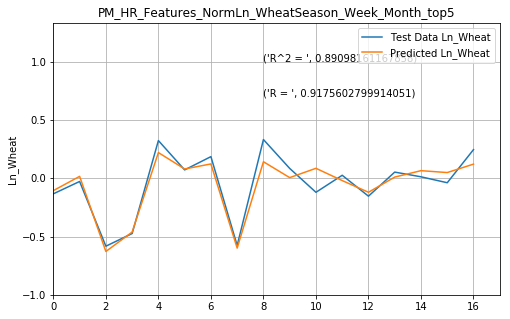

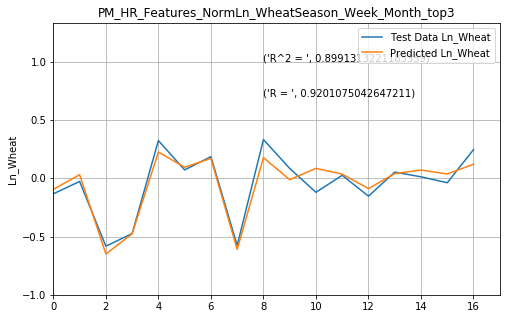

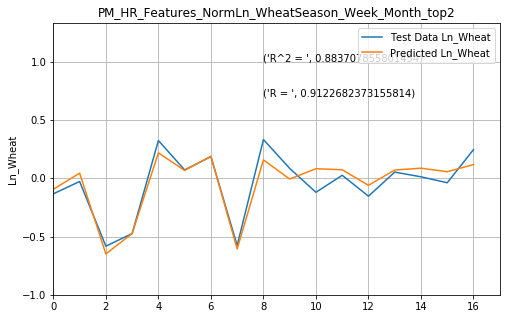

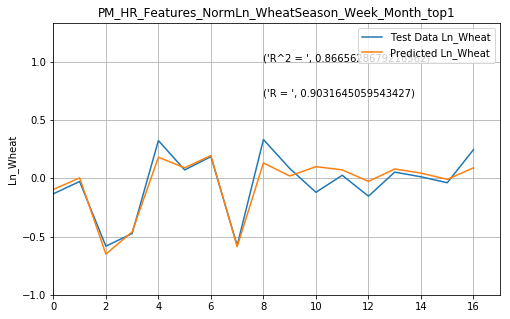

In [73]:
#This model designated to work only with Potohar Wheat Features Jhelum Normalized!!!!!!!!!!!!!!!
#run model
for i in target:
    for j in top_features:
        RFR_PM_HR_Norm_model('Wheat_ton_ha', Top_Features[j], Potohar_HR_Features)

/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Meanweekly_C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2781604276703791
R2 is: 0.5388472782575626
NS is 0.5388472782575626
Correlation is 0.7765115199522378
MAPE is 20.91126269590402


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Minweekly_C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2764245341061412
R2 is: 0.5445850764246548
NS is 0.5445850764246549
Correlation is 0.750234740829365
MAPE is 20.865125445244026


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Maxweekly_C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.35568399729407446
R2 is: 0.24598022189995916
NS is 0.24598022189995927
Correlation is 0.5819634364917415
MAPE is 27.29611693675563


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Monthly_AirTemp_Max
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=35,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.37449178692194257
R2 is: 0.16413011149164458
NS is 0.1641301114916447
Correlation is 0.5315790853204215
MAPE is 30.044578869608156


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_MeanweeklyMonthly_C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2850263435736274
R2 is: 0.5158007766458284
NS is 0.5158007766458285
Correlation is 0.7616600066437821
MAPE is 21.437629560678666


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Airtemp_Hrsabove
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.33792323566582677
R2 is: 0.3194027415672436
NS is 0.3194027415672437
Correlation is 0.6559928364809432
MAPE is 27.79236928263902


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Seasson_Airtemp_Hrsbelow
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.269573672051963
R2 is: 0.5668792061622185
NS is 0.5668792061622185
Correlation is 0.8160466233857868
MAPE is 21.07307645277936


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Meanweekly_STemp_0_10cm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=35,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.32307846012934954
R2 is: 0.3778858293270325
NS is 0.37788582932703263
Correlation is 0.6792578641352508
MAPE is 25.872982540139727


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Minweekly_STemp_0_10cm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.26326836261663883
R2 is: 0.5869035810792956
NS is 0.5869035810792956
Correlation is 0.7829266136850057
MAPE is 19.639980476431287


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Maxweekly_STemp_0_10cm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3900, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.28116160368910076
R2 is: 0.5288424997316891
NS is 0.5288424997316892
Correlation is 0.7970908867512219
MAPE is 22.64855674029443


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Meanweekly_STemp_0_10cm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=60,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.32307846012934954
R2 is: 0.3778858293270325
NS is 0.37788582932703263
Correlation is 0.6792578641352508
MAPE is 25.872982540139727


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_STempMean
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.43555784213408294
R2 is: -0.13069575182246806
NS is -0.13069575182246806
Correlation is 0.22783479805892812
MAPE is 36.262925949852985


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_STempMin
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=55,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3300, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.24972275065633046
R2 is: 0.628319047562855
NS is 0.6283190475628551
Correlation is 0.7943869200296277
MAPE is 19.29376249130817


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_STempHrs0_5C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2100, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.3510814012611034
R2 is: 0.2653681867464579
NS is 0.2653681867464581
Correlation is 0.6367135518708643
MAPE is 28.23797317588248


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_STempHrsabove_10C
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=25,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1300, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.42064489019230933
R2 is: -0.0545940597495711
NS is -0.0545940597495711
Correlation is 0.16505913790887758
MAPE is 34.869735465168226


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_STempHrsabove
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.37366565832334947
R2 is: 0.16781390047030642
NS is 0.16781390047030653
Correlation is 0.45259313599990014
MAPE is 30.482446383756862


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Seasson_STempHrsbelow
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3300, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.34559007124877555
R2 is: 0.288169489280923
NS is 0.2881694892809231
Correlation is 0.5461009405803969
MAPE is 26.941861847335392


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Sumweekly_Precip_mm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.32545364448893954
R2 is: 0.3687049793594398
NS is 0.36870497935944
Correlation is 0.5926551233281839
MAPE is 25.822772547246053


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Sumweekly_Monthly_Precip_mm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.278878953167754
R2 is: 0.5364617631636319
NS is 0.5364617631636318
Correlation is 0.733590427540006
MAPE is 21.45172677483925


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Precip_SumMonthly
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1300, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.23653841945948173
R2 is: 0.6665294648370732
NS is 0.6665294648370734
Correlation is 0.8237352982547471
MAPE is 16.40684233113576


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Precip_SumMonthlyADV
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3300, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.23605599142350298
R2 is: 0.6678883263715251
NS is 0.6678883263715252
Correlation is 0.8053448384558839
MAPE is 15.496162487025986


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Precip_Hours
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.25948052607907546
R2 is: 0.5987051142820032
NS is 0.5987051142820033
Correlation is 0.8374697830822451
MAPE is 21.860134011672113


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Precip_StatsBasictop5
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2290742358568335
R2 is: 0.6872433314302185
NS is 0.6872433314302187
Correlation is 0.804941454060916
MAPE is 13.374052094482197


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Preciphrs_1_5mmhr
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=60,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.20040615466728548
R2 is: 0.7606264308079297
NS is 0.7606264308079297
Correlation is 0.874839396148954
MAPE is 15.434821967920723


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Preciphrs_1_5mmhrADV
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=30,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1100, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.23195890150624343
R2 is: 0.6793168269324534
NS is 0.6793168269324534
Correlation is 0.8334880151972591
MAPE is 16.478192895035956


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Meanweekly_SM_0_10cm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.23960466374549527
R2 is: 0.6578278808335576
NS is 0.6578278808335576
Correlation is 0.8129242194407859
MAPE is 16.956170809809947


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Jan_Apr_Meanweekly_Monthly_SM_0_10cm
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.23286622055587877
R2 is: 0.6768031832984245
NS is 0.6768031832984245
Correlation is 0.8223618751909894
MAPE is 16.362565899250082


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_SMMax
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.23421007852576342
R2 is: 0.673062118013722
NS is 0.6730621180137221
Correlation is 0.8310060566023081
MAPE is 17.62688637526709


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_SMMean
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3900, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.24794702825818837
R2 is: 0.6335861337758086
NS is 0.6335861337758086
Correlation is 0.8421155925344421
MAPE is 19.112411565358677


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_SMMin
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2703804209306225
R2 is: 0.5642829395199684
NS is 0.5642829395199687
Correlation is 0.8766953568423915
MAPE is 22.420542552638086


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top5
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=35,
           max_features=0.75, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.20822810923711488
R2 is: 0.7415760283953036
NS is 0.7415760283953037
Correlation is 0.8393596302896432
MAPE is 13.663023938336503


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top3
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=15,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3900, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.20399301984659937
R2 is: 0.7519811441347869
NS is 0.751981144134787
Correlation is 0.8445788387548071
MAPE is 12.982640899763625


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top2
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.21004231749590638
R2 is: 0.7370533221112288
NS is 0.7370533221112288
Correlation is 0.8457523340846227
MAPE is 13.970509890425053


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Potohar_HR_Features
Season_Week_Month_top1
Wheat_ton_ha
RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=5,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2700, n_jobs=-1,
           oob_score='False', random_state=42, verbose=0, warm_start=False)
RMSE is: 0.2593896501293012
R2 is: 0.5989861501536459
NS is 0.5989861501536458
Correlation is 0.7844666589954521
MAPE is 19.0722790104845


/uufs/chpc.utah.edu/sys/installdir/python/3.5.2-c7/lib/python3.5/site-packages/matplotlib-3.0.1-py3.5-linux-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


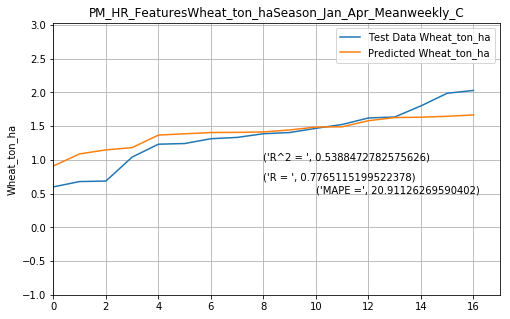

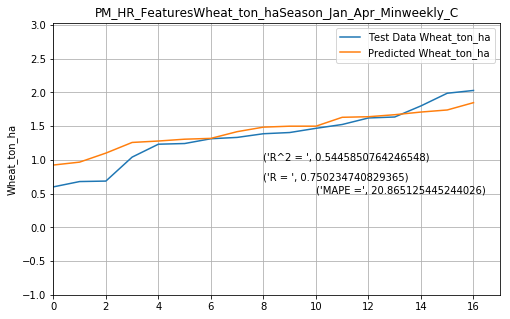

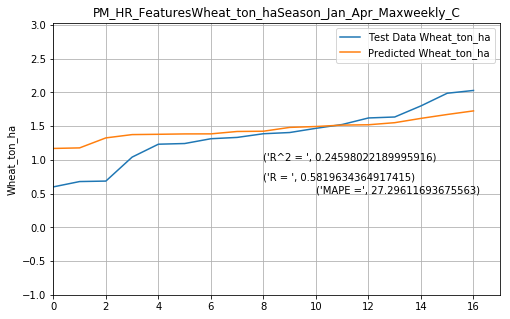

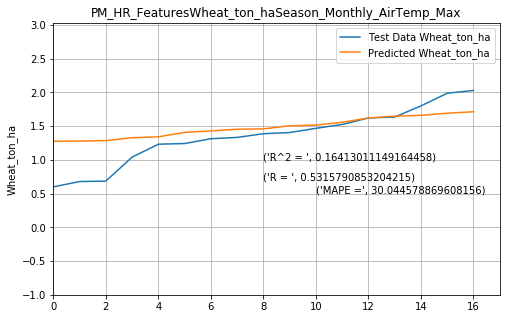

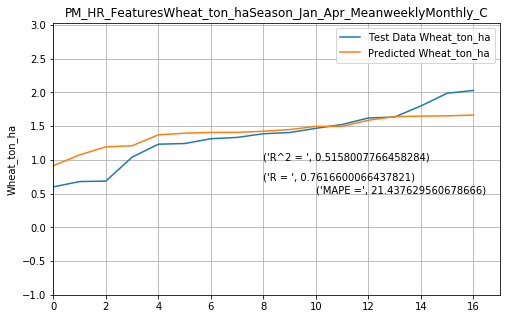

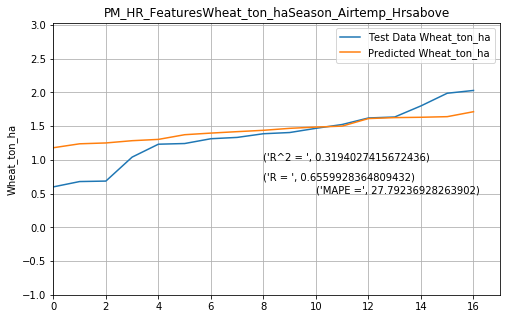

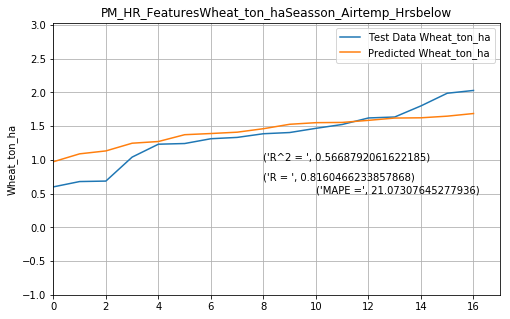

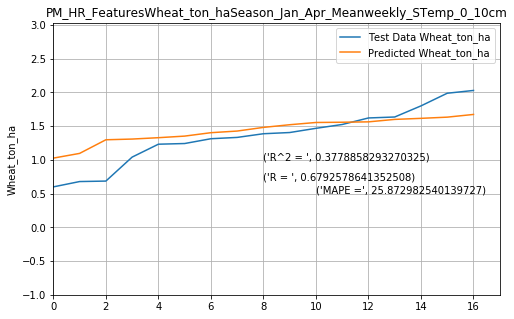

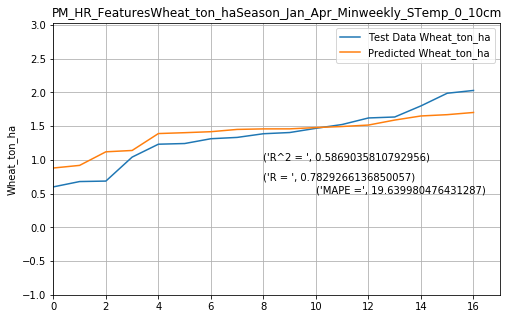

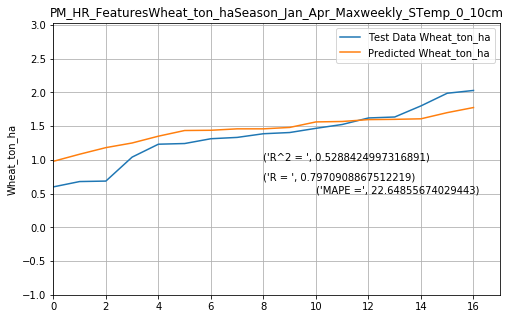

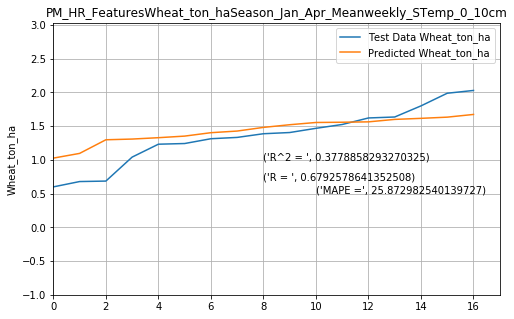

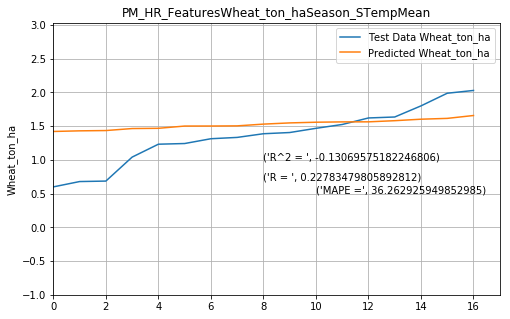

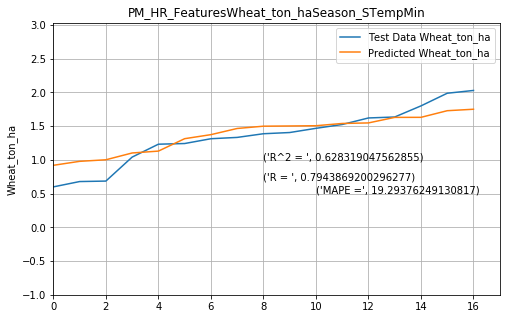

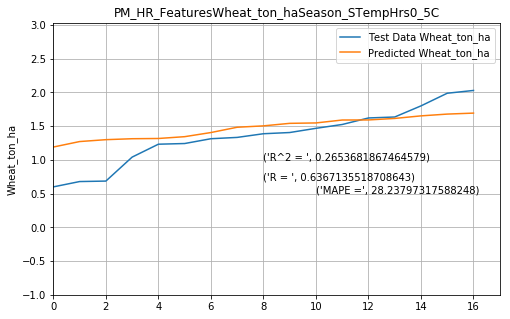

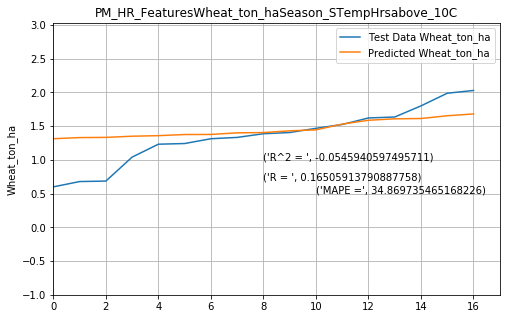

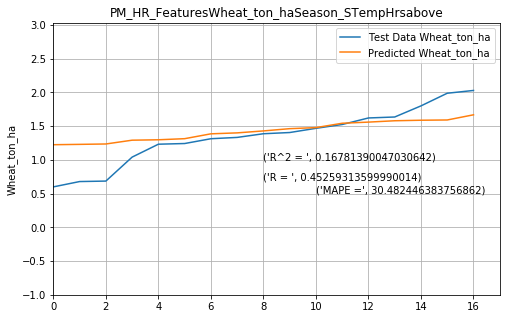

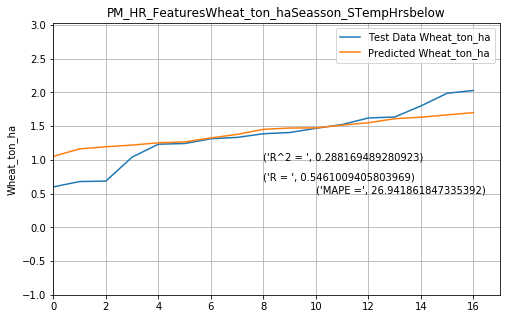

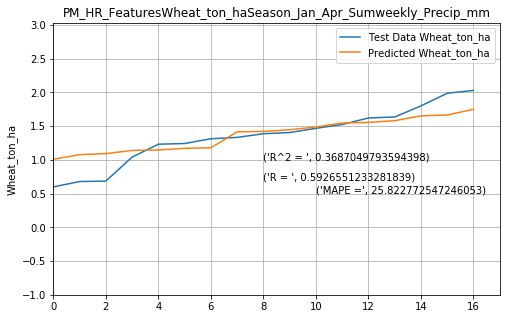

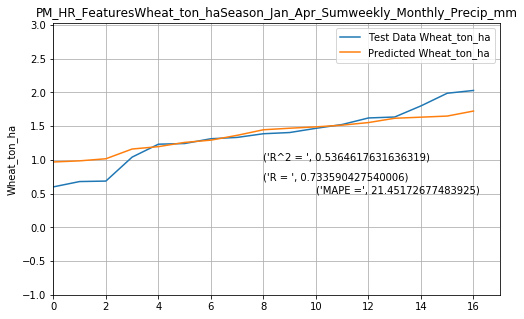

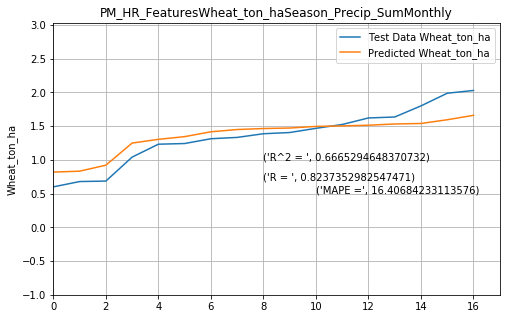

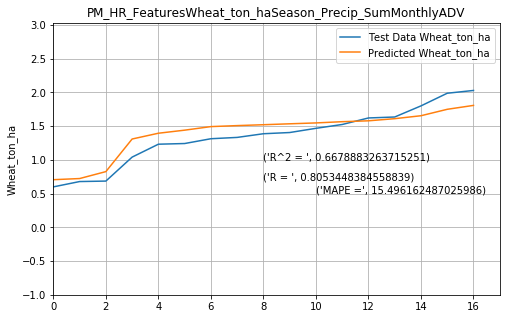

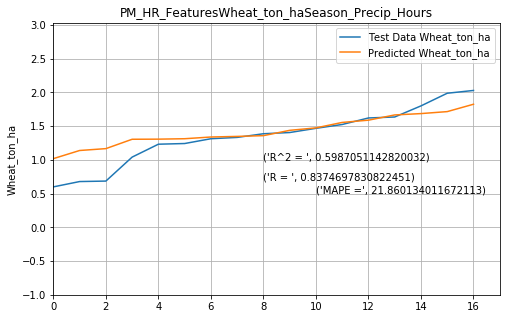

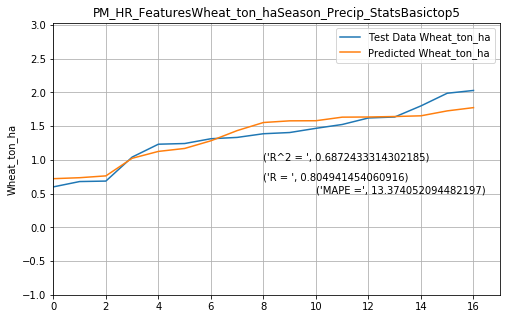

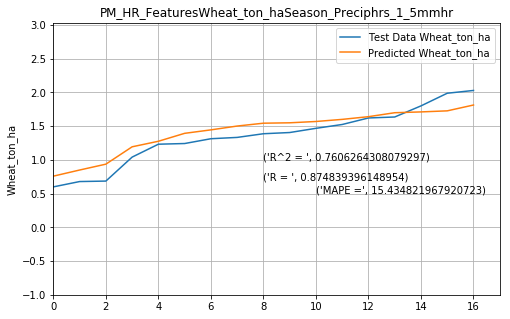

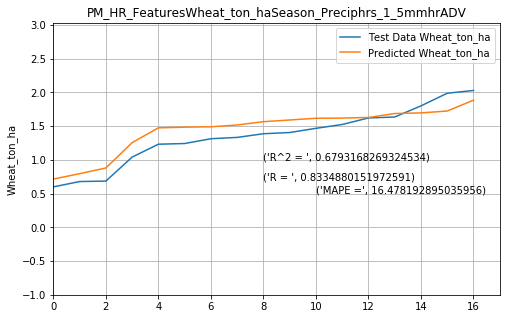

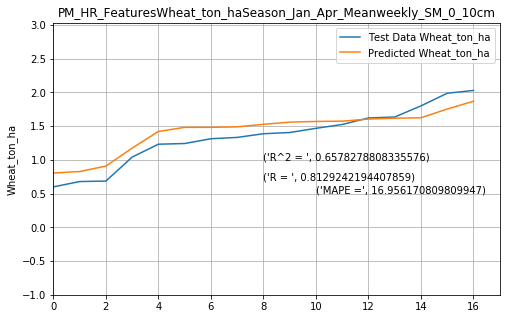

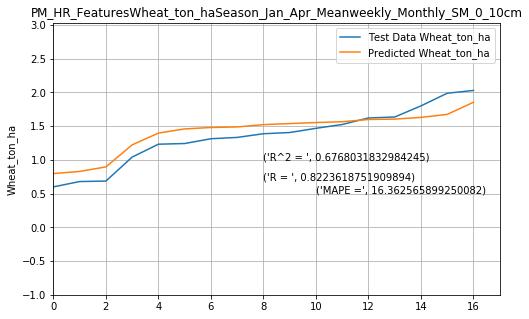

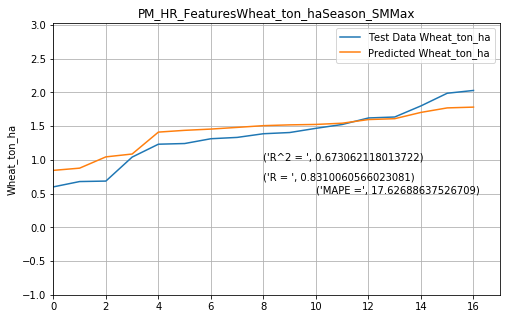

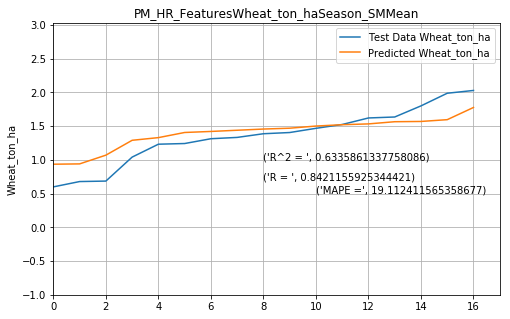

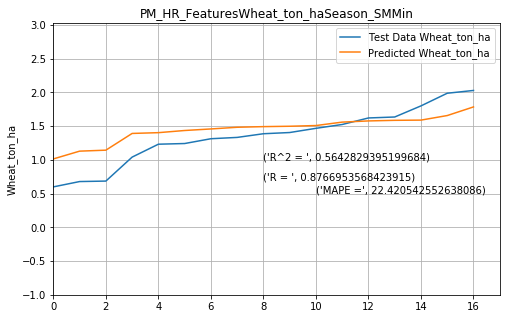

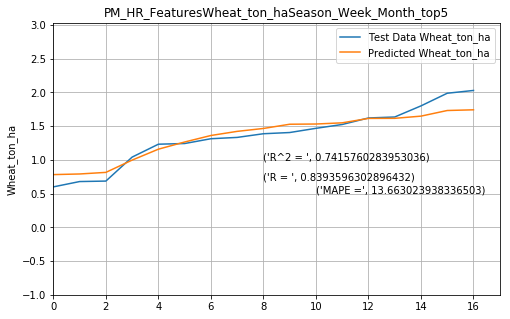

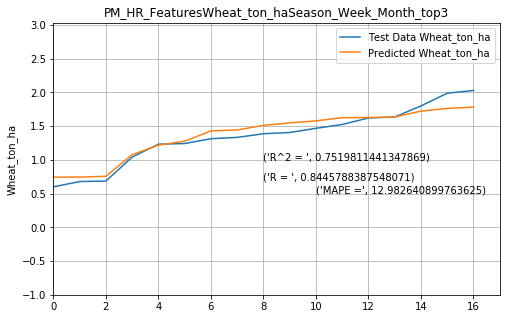

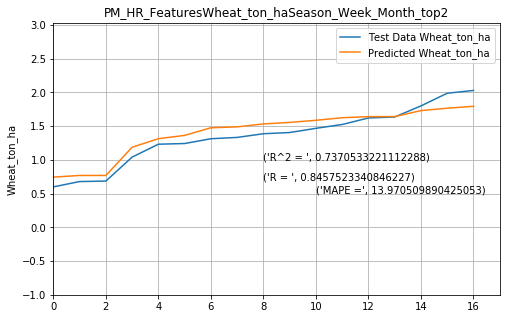

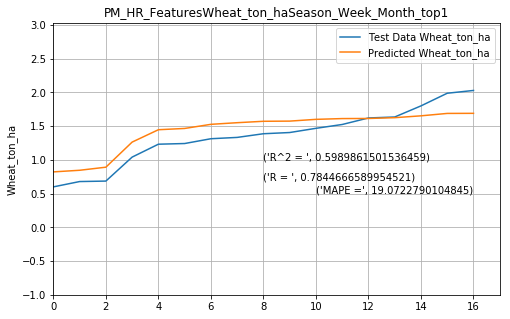

In [14]:

#run model
for j in top_features:
    RFR_PM_HR_Norm_model('Wheat_ton_ha', Top_Features[j], Potohar_HR_Features)